In [1]:
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [2]:
resnetModel = ResNet50(weights="imagenet")

102967424/102967424 [==============================] - 4s 0us/step


In [3]:
imagePath= "../input/catsimagedata/DogsImage.jpeg"

In [4]:
img = image.load_img(imagePath, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x)

In [5]:
modelPredictions = resnetModel.predict(x)

1/1 [==============================] - 5s 5s/step


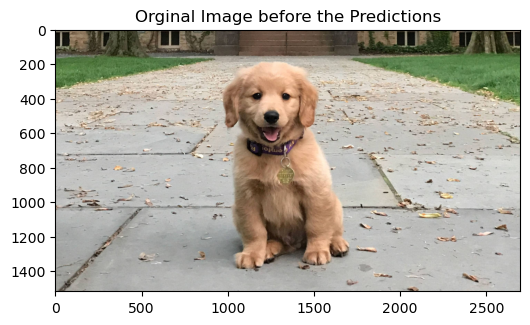

35363/35363 [==============================] - 0s 0us/step
Predicted Class: Golden Retriever
Accuracy : 0.9866125583648682


In [6]:
plt.figure(figsize = (6, 4))
imageRead = plt.imread("../input/catsimagedata/DogsImage.jpeg")
plt.imshow(imageRead)
plt.title("Orginal Image before the Predictions")
plt.show()
#print("Predictions Result is : {}".format(decode_predictions(modelPredictions, top = 3)[0]))
# _, classnames, accuracy = decode_predictions(modelPredictions, top = 3)[0][0]
# print("Predicted Class: {}\nAccuracy : {}%".format(classnames, accuracy))
_, classnames, accuracy = decode_predictions(modelPredictions, top = 3)[0][0]
r = classnames.split("_")
classNamesFirst, classNamesSec = r[0].title(), r[1].title()
print("Predicted Class: {} {}\nAccuracy : {}".format(classNamesFirst, classNamesSec, accuracy))

In [7]:
# a, b, c = [(3, 4, 5)]

In [8]:
decode_predictions(modelPredictions, top = 3)

[[('n02099601', 'golden_retriever', 0.98661256),
  ('n02099712', 'Labrador_retriever', 0.0040507377),
  ('n02104029', 'kuvasz', 0.0036168876)]]

In [ ]:
decode_predictions(modelPredictions, top = 3)[0]

In [ ]:
decode_predictions(modelPredictions, top = 3)[0][0]

In [9]:
_, classnames, accuracy = decode_predictions(modelPredictions, top = 3)[0][0]
r = classnames.split("_")
classNamesFirst, classNamesSec = r[0].title(), r[1].title()
print("Predicted Class: {} {}\nAccuracy : {}%".format(classNamesFirst, classNamesSec, accuracy))

Predicted Class: Golden Retriever
Accuracy : 0.9866125583648682%


In [10]:
r = classnames.split("_")

In [11]:
classNamesFirst, classNamesSec = r[0].title(), r[1].title()

In [12]:
# model = Sequential()
# # Input Layer 01
# model.add(Conv2D())
# model.add(MaxPooling2D(pool_size = (2, 2)))

# # HiddenLayer 01
# model.add(Conv2D())
# model.add(MaxPooling2D(pool_size = (2, 2)))

# # # Hidden Layer 02
# model.add(Conv2D())
# model.add(MaxPooling2D(pool_size = (2, 2)))

# # # Hidden Layer 03
# model.add(Conv2D(128))
# model.add(MaxPooling2D(pool_size = (2, 2)))

# # Flatten Layer
# model.add(Flatten())

# # Fully Connceted Neural Network
# model.add(Dense(128))
# model.add(Dense(number_of_classes))

In [13]:
def drawTextonImage(names, predictions, input_image):
    backgroundColor = [0, 0, 0]
    expandImage = cv2.copyMakeBorder(input_image, 0, 0, 0, imageL.shape[1]+300, cv2.BORDER_CONSTANT, value = backgroundColor)
    image_width = input_image.shape[1]
    
    for (i, predictions) in enumerate(predictions):
        imageStrings = str(predictions[1])  + " " + str(predictions[2])
        
        cv2.putText(expandImage, str(names), (image_width + 50, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 255, 255), 1)
        cv2.putText(expandImage, imageStrings, (image_width + 50, 50+((i+1)*50)), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 255, 255), 1)
        plt.imshow(expandImage)
    
imagePath = "../input/cat-and-dogs/dataset/test_set/dogs/"
imageFileName = [f for f in listdir(imagePath) if isfile(join(imagePath, f))]

In [14]:
len(imageFileName)

1000

1/1 [==============================] - 0s 23ms/step


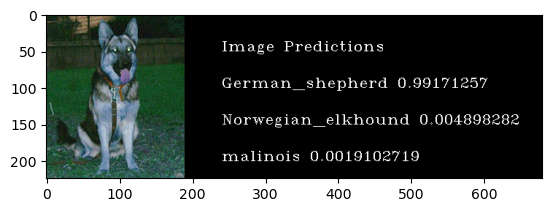

In [15]:
from tensorflow.keras.preprocessing import image
for file in imageFileName:
    img = image.load_img(imagePath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x = preprocess_input(x)
    
    imageNew = cv2.imread(imagePath+file)
    imageL = cv2.resize(imageNew, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_CUBIC)
    
    predictions = resnetModel.predict(x)
    predictions = decode_predictions(predictions, top = 3)[0]
    drawTextonImage("Image Predictions ", predictions, imageL)